<a href="https://colab.research.google.com/github/esoulard47/DataAnalyse_BankMarketing/blob/main/Analyse_des_Ventes_et_de_la_Satisfaction_Client_d'Olist_Emmanuelle_Soulard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analyse des Ventes et de la Satisfaction Client d'Olist


## Contexte
Olist est une place de marché en ligne brésilienne, où divers vendeurs peuvent proposer leurs produits. Les données disponibles couvrent une période étendue d’activité sur la plateforme, avec des informations détaillées sur les commandes, les produits, les clients, la logistique et la satisfaction des clients.

L’objectif de cette analyse est de comprendre les dynamiques de vente et la satisfaction des clients sur Olist. Nous allons explorer et manipuler les données pour obtenir des insights sur les performances des vendeurs, les préférences des clients, et les facteurs impactant la satisfaction. Ce projet permettra également d'identifier des opportunités d'amélioration pour la logistique, le service client, et le catalogue produit.
## Objectifs
1. **Analyser la performance des ventes** : comprendre les volumes de ventes, les catégories de produits populaires, et les tendances par période.
2. **Étudier la satisfaction client** : évaluer les scores de satisfaction en fonction des délais de livraison, des catégories de produits, et des régions géographiques.
3. **Explorer la logistique** : analyser les délais de livraison par région et identifier les zones de logistique inefficace.
4. **Segmenter les clients** : identifier les groupes de clients basés sur leurs comportements d’achat et leur localisation pour des analyses de ciblage marketing.

## data

https://www.kaggle.com/code/khushisarpal/e-commerce-data-analysis/input
Nous allons charger les fichiers suivants et afficher leurs premières lignes pour avoir un aperçu des informations qu'ils contiennent :

- **olist_orders_dataset.csv** : Informations sur les commandes.
- **olist_order_items_dataset.csv** : Détails de chaque article dans les commandes.
- **olist_customers_dataset.csv** : Informations sur les clients.
- **olist_products_dataset.csv** : Informations sur les produits.
- **olist_sellers_dataset.csv** : Informations sur les vendeurs.
- **olist_geolocation_dataset.csv** : Informations géographiques.
- **olist_order_payments_dataset.csv** : Informations sur les paiements des commandes.
- **olist_order_reviews_dataset.csv** : Informations sur les avis des clients.

## Étapes du Projet

### 1. Chargement et Exploration des Données
   - Importer et explorer chaque fichier pour comprendre sa structure.
   - Lier les différents fichiers (commandes, produits, clients, etc.) pour former un jeu de données complet, prêt pour l’analyse.

### 2. Nettoyage et Préparation des Données
   - Gérer les valeurs manquantes et traiter les doublons.
   - Unifier les formats de date, ajuster les types de données, et filtrer les valeurs aberrantes.
   - Effectuer des jointures logiques entre les tables (par exemple, relier les commandes aux clients et aux produits).

### 3. Transformation des Données et Création de Variables
   - Calculer des métriques clés comme le total des ventes, le délai moyen de livraison, et le score de satisfaction.
   - Créer des variables dérivées (ex. : fréquence d’achat, panier moyen, répartition géographique).
   - Encodage des variables catégorielles pour faciliter les analyses.

### 4. Analyse Exploratoire des Données (EDA)
   - Étudier les ventes par période (mensuelle, trimestrielle) et par région.
   - Analyser les scores de satisfaction et identifier les principaux facteurs d’insatisfaction.
   - Visualiser la répartition des délais de livraison et identifier les régions à forte demande.

### 5. Agrégations et Modélisations Avancées
   - Segmenter les clients en fonction de leurs comportements d’achat.
   - Analyser les performances des catégories de produits pour recommander des stratégies d’amélioration du catalogue.
   - Identifier des patterns de livraison par région pour optimiser la logistique.

---

## 1. Chargement et Exploration des Données

L'objectif de cette première étape est de charger tous les fichiers de données disponibles dans le dataset Olist et d'explorer leur contenu pour comprendre leur structure et leurs relations.

### Étapes à Réaliser
1. Charger chaque fichier CSV du dataset en tant que DataFrame Pandas.
2. Examiner les dimensions noms des colonnes, types de données par colonne, nombre de valeurs manquantes par colonne, et un aperçu des premières lignes.
3. Analyser les relations entre les tables pour préparer les jointures et regroupements.
4. Automatiser le chargement en créant une liste contenant les noms des fichiers et en utilisant un dictionnaire de DataFrames pour stocker l'ensemble des données.
5. Écrire une fonction analyse_dataframe qui prend en entrée un DataFrame Pandas et affiche les éléments de l'étape 2 : Dimensions, noms des colonnes, types de données par colonne, nombre de valeurs manquantes par colonne, et un aperçu des premières lignes.



### Importation des Bibliothèques
Nous utiliserons les bibliothèques **Pandas** et **NumPy** pour manipuler les données et effectuer des analyses.


In [ ]:
# Chargement de chaque fichier en tant que DataFrame
import pandas as pd
import numpy as np
path='/content/'

# Charger les fichiers CSV dans des DataFrames
orders = pd.read_csv('/content/olist_orders_dataset.csv')
order_items = pd.read_csv('/content/olist_order_items_dataset.csv')
customers = pd.read_csv('/content/olist_customers_dataset.csv')
products = pd.read_csv('/content/olist_products_dataset.csv')
sellers = pd.read_csv('/content/olist_sellers_dataset.csv')
geolocation = pd.read_csv('/content/olist_geolocation_dataset.csv')
order_payments = pd.read_csv('/content/olist_order_payments_dataset.csv')
order_reviews = pd.read_csv('/content/olist_order_reviews_dataset.csv')
product_category = pd.read_csv('/content/product_category_name_translation.csv')
_

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [ ]:
# Analyse préliminaire
dfo= orders
print('question 1 pour le df Order')
print("Dimensions du DataFrame :", dfo.shape)
print("\nNoms des colonnes :", dfo.columns.tolist())
print("\nTypes de données par colonne :\n", dfo.dtypes)
print("\nNombre de valeurs manquantes par colonne :\n", dfo.isnull().sum())
print("\nAperçu des premières lignes :\n")
dfo.head()

# Gros dataframe : presque 100 000 lignes !
# Presque toutes les données sont catégorisées sous forme d'objet => il cva falloir les convertir
# Beaucoup de données manquantes
# Les données manquantes sont centralisées sur certaines colonnes
# ça va donc être facile de les supprimer ou de les mettre à l'écart
# aperçu des premières lignes : on a des données chiffrées order date ou ID, par exemple
# On a des dates qui n'ont pas été reconnues => il va falloir les transformer
# On a des données catégorielles (Order_statuts) qui n'ont pas été reconnues => a convertir



question 1 pour le df Order
Dimensions du DataFrame : (99441, 8)

Noms des colonnes : ['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']

Types de données par colonne :
 order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object

Nombre de valeurs manquantes par colonne :
 order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: 

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [ ]:
dfo_i= order_items
print('question 1 pour le df Order_items')
print("Dimensions du DataFrame :", dfo_i.shape)
print("\nNoms des colonnes :", dfo_i.columns.tolist())
print("\nTypes de données par colonne :\n", dfo_i.dtypes)
print("\nNombre de valeurs manquantes par colonne :\n", dfo_i.isnull().sum())
print("\nAperçu des premières lignes :\n", dfo_i.head())

# Gros dataframe également
# Pas de valeurs manquantes, par contre
# Données de plusieurs types, correctement étiquetées

question 1 pour le df Order_items
Dimensions du DataFrame : (112650, 7)

Noms des colonnes : ['order_id', 'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date', 'price', 'freight_value']

Types de données par colonne :
 order_id                object
order_item_id            int64
product_id              object
seller_id               object
shipping_limit_date     object
price                  float64
freight_value          float64
dtype: object

Nombre de valeurs manquantes par colonne :
 order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

Aperçu des premières lignes :
                            order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4 

In [ ]:
dfcust= customers
print('question 1 pour le df Customer')
print("Dimensions du DataFrame :", dfcust.shape)
print("\nNoms des colonnes :", dfcust.columns.tolist())
print("\nTypes de données par colonne :\n", dfcust.dtypes)
print("\nNombre de valeurs manquantes par colonne :\n", dfcust.isnull().sum())
print("\nAperçu des premières lignes :\n", dfcust.head())

# toujours un gros dataframe
# Pas de valeur manquante
# peut-etre des conversion de type de data à faire
# (à confirmer selon les besoins)


question 1 pour le df Customer
Dimensions du DataFrame : (99441, 5)

Noms des colonnes : ['customer_id', 'customer_unique_id', 'customer_zip_code_prefix', 'customer_city', 'customer_state']

Types de données par colonne :
 customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object

Nombre de valeurs manquantes par colonne :
 customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Aperçu des premières lignes :
                         customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d770

Cette methode est tres inefficace et prend beaucoup de temps => Je décide de créer un dictionnaire

In [ ]:
import pandas as pd

# Liste des noms de fichiers
file_names = ['olist_orders_dataset','olist_order_items_dataset','olist_customers_dataset','olist_products_dataset','olist_sellers_dataset','olist_geolocation_dataset','olist_order_payments_dataset','olist_order_reviews_dataset','product_category_name_translation']
# Dictionnaire pour stocker les DataFrames
dataframes = {}
# Chemin d'accès aux fichiers
path = '/content/'

# Boucle pour charger chaque fichier dans le dictionnaire
for file in file_names :
  dataframes[file] = pd.read_csv(path + file+'.csv')

# Affichage des clés du dictionnaire pour vérification
print('affichage des cles', dataframes.keys())

# ça permet d'identifier les clés de colonnes identiques (pour les fusions à venir)


affichage des cles dict_keys(['olist_orders_dataset', 'olist_order_items_dataset', 'olist_customers_dataset', 'olist_products_dataset', 'olist_sellers_dataset', 'olist_geolocation_dataset', 'olist_order_payments_dataset', 'olist_order_reviews_dataset', 'product_category_name_translation'])


## 1.2. Examiner les dimensions noms des colonnes, types de données par colonne, nombre de valeurs manquantes par colonne, et un aperçu des premières lignes.

In [ ]:
 #Analyse des colonnes pour voir s'il y a des colonnes identiques
 def find_identical_columns(dataframes):

  identical_columns = {}
  for df_name, df in dataframes.items():
    for column in df.columns:
      if column in identical_columns:
        identical_columns[column].append(df_name)
      else:
        identical_columns[column] = [df_name]

  # Filtrage des colonnes du DataFrame
  identical_columns = {k: v for k, v in identical_columns.items() if len(v) > 1}

  return identical_columns

# Affichage des colonnes identiques:
identical_cols = find_identical_columns(dataframes)
for column, df_names in identical_cols.items():
  print(f"Column '{column}' is present in DataFrames: {df_names}")

Column 'order_id' is present in DataFrames: ['olist_orders_dataset', 'olist_order_items_dataset', 'olist_order_payments_dataset', 'olist_order_reviews_dataset']
Column 'customer_id' is present in DataFrames: ['olist_orders_dataset', 'olist_customers_dataset']
Column 'product_id' is present in DataFrames: ['olist_order_items_dataset', 'olist_products_dataset']
Column 'seller_id' is present in DataFrames: ['olist_order_items_dataset', 'olist_sellers_dataset']
Column 'product_category_name' is present in DataFrames: ['olist_products_dataset', 'product_category_name_translation']


##1.3. Analyser les relations entre les tables pour préparer les jointures et regroupements.

In [ ]:
# Fonction de distances, pour identifier des colonnes traitant la même donnée mais avec intitulé différent
!pip install rapidfuzz
!pip install python-Levenshtein
from rapidfuzz import process
import Levenshtein

def find_similar_columns(dataframes, threshold=0.8):
  all_columns = []
  for df_name, df in dataframes.items():
    all_columns.extend([(df_name, col) for col in df.columns])

  similar_columns = []
  for i in range(len(all_columns)):
    for j in range(i + 1, len(all_columns)):
      df_name1, col1 = all_columns[i]
      df_name2, col2 = all_columns[j]

      # Calcul de la distance de Levenshtein et du ratio de similarité
      distance = Levenshtein.distance(col1, col2)
      similarity_ratio = 1 - (distance / max(len(col1), len(col2)))

      if similarity_ratio >= threshold and col1 != col2:
        similar_columns.append(((df_name1, col1), (df_name2, col2)))

  return similar_columns

# Exemple test
similar_cols = find_similar_columns(dataframes, threshold=0.8)
for (df_name1, col1), (df_name2, col2) in similar_cols:
  print(f"Similar columns: '{col1}' in '{df_name1}' and '{col2}' in '{df_name2}'")

  # Ce programme nous retourne les colonnes communes à différents datasets,
  # Donc, nous voyons comment nous pouvons fusionner les différents dataset pour les analyser
  # A l'analyse : nous avons des dates 'order_delivered_carrier_date' et 'order_delivered_customer_date'
  # Mais il n'est pas cohérent de les fusionner
  # De la même façon, les autres données apportées par ce programme sont des données de geolocalisation
  # Uniquement dans le dataset 'geolocalisation'.
  # Ce n'est donc pas pertinent de fusionner les tables à partir de ces colonnes.

  # Je décide donc de fusionner uniquement à partir de colonnes ayant EXACTEMENT le même nom de colonne



Similar columns: 'order_delivered_carrier_date' in 'olist_orders_dataset' and 'order_delivered_customer_date' in 'olist_orders_dataset'
Similar columns: 'product_weight_g' in 'olist_products_dataset' and 'product_height_cm' in 'olist_products_dataset'
Similar columns: 'geolocation_lat' in 'olist_geolocation_dataset' and 'geolocation_lng' in 'olist_geolocation_dataset'
Similar columns: 'geolocation_lat' in 'olist_geolocation_dataset' and 'geolocation_city' in 'olist_geolocation_dataset'
Similar columns: 'geolocation_lat' in 'olist_geolocation_dataset' and 'geolocation_state' in 'olist_geolocation_dataset'


In [ ]:
 def find_identical_columns_with_types(dataframes):

  identical_columns = {}
  for df_name, df in dataframes.items():
    for column in df.columns:
      if column in identical_columns:
        identical_columns[column].append((df_name, df[column].dtype))
      else:
        identical_columns[column] = [(df_name, df[column].dtype)]

  # Filtrage des colonnes presentes en un seul exemplaire dans le DataFrame
  identical_columns = {k: v for k, v in identical_columns.items() if len(v) > 1}

  # repérage des erreurs de type de data
  mismatched_types = {}
  for column, df_types in identical_columns.items():
    first_type = df_types[0][1]
    for df_name, dtype in df_types[1:]:
      if dtype != first_type:
        if column not in mismatched_types:
          mismatched_types[column] = []
        mismatched_types[column].append((df_name, dtype))

  return identical_columns, mismatched_types

# Exemple test:
identical_cols, mismatched_types = find_identical_columns_with_types(dataframes)

# affichage des colonnes identiques et de leur type
for column, df_types in identical_cols.items():
  print(f"Column '{column}' is present in:")
  for df_name, dtype in df_types:
    print(f"  - {df_name} (type: {dtype})")

# affichage des colonnes avec des types incorrects
for column, mismatches in mismatched_types.items():
  print(f"Column '{column}' has mismatched types:")
  for df_name, dtype in mismatches:
    print(f"  - {df_name} (type: {dtype})")

  # Pas de mismatch détecté.
  # Nous avons ici la liste complète des colonnes communes à plusieurs datasets :
  # Order_id, 'Customer_id', 'product_id', 'seller_id' et 'product_category_name'.

Column 'order_id' is present in:
  - olist_orders_dataset (type: object)
  - olist_order_items_dataset (type: object)
  - olist_order_payments_dataset (type: object)
  - olist_order_reviews_dataset (type: object)
Column 'customer_id' is present in:
  - olist_orders_dataset (type: object)
  - olist_customers_dataset (type: object)
Column 'product_id' is present in:
  - olist_order_items_dataset (type: object)
  - olist_products_dataset (type: object)
Column 'seller_id' is present in:
  - olist_order_items_dataset (type: object)
  - olist_sellers_dataset (type: object)
Column 'product_category_name' is present in:
  - olist_products_dataset (type: object)
  - product_category_name_translation (type: object)


## 1.5 : Écrire une fonction analyse_dataframe qui prend en entrée un DataFrame Pandas et affiche les éléments de l'étape 2 : Dimensions, noms des colonnes, types de données par colonne, nombre de valeurs manquantes par colonne, et un aperçu des premières lignes.

In [ ]:
#Ecrire une fonction analyse_dataframe qui prend en entrée un DataFrame Pandas et affiche les éléments de l étape 2 : Dimensions, noms des colonnes, types de données par colonne, nombre de valeurs manquantes par colonne, et un aperçu des premières lignes.
def analyse_dataframe(df):
  """
  Analyzes a Pandas DataFrame and displays its properties.

  Args:
    df: The Pandas DataFrame to analyze.
  """
  print("Dimensions du DataFrame :", df.shape)
  print("\nNoms des colonnes :", df.columns.tolist())
  print("\nTypes de données par colonne :\n", df.dtypes)
  print("\nNombre de valeurs manquantes par colonne :\n", df.isnull().sum())
  print("\nAperçu des premières lignes :\n", df.head())

# Exemple d'usage:
analyse_dataframe(dataframes['olist_orders_dataset'])


Dimensions du DataFrame : (99441, 8)

Noms des colonnes : ['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']

Types de données par colonne :
 order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object

Nombre de valeurs manquantes par colonne :
 order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Aperçu des premières 

### 2. Nettoyage et Préparation des Données
   - Gérer les valeurs manquantes avec plusieurs stratégies différentes :
     - Pour  le DataFrame `olist_products_dataset` Supprimer les ligne vides pour les colonnes de type descriptif
     - Pour  le DataFrame `olist_order_items_dataset`  Remplacer par la moyenne pour les colonnes de type numérique.
     - Pour les données catégorielles, si le cas exist, remplacer par une valeur fréquente
   - Traiter les doublons pour éviter les redondances dans les données.
   - Unifier les formats de date et ajuster les types de données pour assurer la cohérence.


In [ ]:
# Gérer les valeurs manquantes et appliquer les transformations
import numpy as np

# 1. Pour olist_products_dataset : Supprimer les lignes où les colonnes descriptives sont vides
descriptive_columns = ['product_category_name', 'product_name_lenght', 'product_description_lenght',
                       'product_photos_qty', 'product_weight_g', 'product_length_cm',
                       'product_height_cm', 'product_width_cm']

# Supprimer les lignes où les colonnes descriptives contiennent des valeurs manquantes
dataframes['olist_products_dataset'] = dataframes['olist_products_dataset'].dropna(subset=descriptive_columns)

# Affichage des dimensions après suppression des lignes vides
print("Shape of olist_products_dataset after removing rows:", dataframes['olist_products_dataset'].shape)

# 2. Pour olist_order_items_dataset : Remplacer les valeurs manquantes par la moyenne pour les colonnes numériques
# Sélection des colonnes numériques
numeric_columns = dataframes['olist_order_items_dataset'].select_dtypes(include=np.number).columns.tolist()

# Remplacement des valeurs manquantes par la moyenne pour chaque colonne numérique
for column in numeric_columns:
    mean_value = dataframes['olist_order_items_dataset'][column].mean()
    dataframes['olist_order_items_dataset'][column] = dataframes['olist_order_items_dataset'][column].fillna(mean_value)

# Affichage des valeurs manquantes après imputation
print("Missing values in olist_order_items_dataset after imputation:\n",
      dataframes['olist_order_items_dataset'].isnull().sum())


Shape of olist_products_dataset after removing rows: (32340, 9)
Missing values in olist_order_items_dataset after imputation:
 order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64


In [ ]:
# 3. Pour les colonnes catégorielles : Remplacer les valeurs manquantes par la valeur la plus fréquente

# Repérage des données catégorielles
categorical_columns = dataframes['olist_order_items_dataset'].select_dtypes(include=['object']).columns.tolist()

# Affichage des valeurs manquantes avant imputation
print("Missing values in olist_order_items_dataset before imputation:\n", dataframes['olist_order_items_dataset'].isnull().sum())

# remplacement des valeurs manquantes par le mode
for column in categorical_columns:
    mode_value = dataframes['olist_order_items_dataset'][column].mode()[0]  # donne la valeur la plus fréquente
    dataframes['olist_order_items_dataset'][column] = dataframes['olist_order_items_dataset'][column].fillna(mode_value)

# Vérification : affichage des valeurs manquantes
print("Missing values in olist_order_items_dataset after imputation:\n", dataframes['olist_order_items_dataset'].isnull().sum())

# Nous constatons qu'il ne reste aucune valeur manquante

Missing values in olist_order_items_dataset before imputation:
 order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64
Missing values in olist_order_items_dataset after imputation:
 order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64


In [ ]:
# 4. Traiter les doublons pour éviter les redondances dans les données

df_name = 'olist_orders_dataset'

# Identification et suppression des colonnes dupliquées
before_shape = dataframes[df_name].shape
dataframes[df_name] = dataframes[df_name].drop_duplicates()
after_shape = dataframes[df_name].shape

# Affichage du nombre de lignes dupliquées
print(f"Removed {before_shape[0] - after_shape[0]} duplicate rows from {df_name}")

# pas de colonne dupliquées dans le order dataset


Removed 0 duplicate rows from olist_orders_dataset


In [ ]:
# 5. Unifier les formats de date et ajuster les types de données
# Supposons que chaque DataFrame qui a une colonne de date a son nom terminé par '_date'
for df_name, df in dataframes.items():
    for column in df.columns:
        if column.endswith('_date'):
            # Conversion en date des objets avec erreur
            try:
                df[column] = pd.to_datetime(df[column], errors='coerce')
            except Exception as e:
                print(f"Error converting column '{column}' in DataFrame '{df_name}': {e}")

            # vérification de l'efficacité de la conversion et affichage si pas non efficace
            if df[column].dtype != 'datetime64[ns]':
                print(f"Warning: Column '{column}' in DataFrame '{df_name}' could not be converted to datetime64[ns]")
            else:
                # On peut aussi changer de format si on veut
                # df[column] = df[column].dt.strftime('%Y-%m-%d')  # Uncomment if needed
                print(f"Converted column '{column}' in DataFrame '{df_name}' to datetime64[ns]")

            # 5 colonnes dont le nom fini par date ont été modifiées


Converted column 'order_delivered_carrier_date' in DataFrame 'olist_orders_dataset' to datetime64[ns]
Converted column 'order_delivered_customer_date' in DataFrame 'olist_orders_dataset' to datetime64[ns]
Converted column 'order_estimated_delivery_date' in DataFrame 'olist_orders_dataset' to datetime64[ns]
Converted column 'shipping_limit_date' in DataFrame 'olist_order_items_dataset' to datetime64[ns]
Converted column 'review_creation_date' in DataFrame 'olist_order_reviews_dataset' to datetime64[ns]


### 3. Jointures et Filtres Logiques entre les Tables

Dans cette section, nous allons effectuer les jointures nécessaires entre les dataframe pour créer une vue intégrée, en reliant les commandes aux clients, produits, paiements, et autres informations. Nous appliquerons également des filtres logiques pour nettoyer et préparer les données.
#### Jointures Principales
1. **`orders` et `customers`** : Relier les commandes aux clients en utilisant `customer_id`, en conservant toutes les commandes, même sans informations client.
2. **`order_items` et `products`** : Associer les détails des produits via `product_id`, en gardant les articles même sans produit correspondant.  
3. **`order_items` et `sellers`** : Associer chaque article à un vendeur via `seller_id`, en conservant les articles même sans information vendeur.  
4. **`orders` et `order_items`** : Associer chaque commande aux articles via `order_id`, en incluant uniquement les commandes ayant des articles.  

5. **`orders` et `payments`** : Associer les paiements aux commandes via `order_id`, en gardant toutes les commandes, même sans paiement associé.  
6. **`orders` et `reviews`** : Associer les avis aux commandes via `order_id`, en conservant toutes les commandes, même sans avis client.

Une fois les tables jointes, nous appliquerons des filtres pour affiner les données et cibler des analyses spécifiques. Ces filtres permettent de réduire le DataFrame final aux informations les plus pertinentes.

#### Filtres Logiques

Une fois les tables jointes, nous appliquerons des filtres pour affiner les données et cibler des analyses spécifiques. Ces filtres permettent de réduire le DataFrame final aux informations les plus pertinentes.

1. **Filtrer les dates de commande** : Garder uniquement les commandes à partie de '2018-01-01'
2. **Filtrer les catégories de produits** : Conserver uniquement certaines catégories pour se concentrer sur des segments de produits spécifiques.
3. **Filtrer les commandes selon les avis clients** : Conserver uniquement les commandes ayant reçu un avis pour l'analyse de satisfaction client.


In [ ]:

# Jointure 1 : Relier les commandes aux clients
merged_df = dataframes['olist_orders_dataset'].merge(
    dataframes['olist_customers_dataset'],
    on='customer_id',
    how='left'  # Conserver toutes les commandes, même sans informations client
)
merged_df

# Vérification que le dataframe est bien stocké dans le dictionnaire
orders_df = dataframes['olist_orders_dataset']
customers_df = dataframes['olist_customers_dataset']

# jointure gauche :
merged_df = pd.merge(orders_df, customers_df, on='customer_id', how='left')

# Stockage du DataFrame joins dans le dictionnaire 'dataframes'
dataframes['merged_orders_customers'] = merged_df

# afficahge des dimensions du nouveau DataFrame
print("Shape of merged DataFrame:", merged_df.shape)

# Le dataframe aprés fusion a pour dimension (99441, 12)

Shape of merged DataFrame: (99441, 12)


In [ ]:

# Jointure 2 : Associer chaque commande aux articles
merged_df = pd.merge(
    dataframes['olist_orders_dataset'],         # DataFrame des commandes (gauche)
    dataframes['olist_order_items_dataset'],   # DataFrame des articles (droite)
    how='left',                                # Type de jointure : gauche
    on='order_id'                              # Clé commune
)

# Affichage des dimensions et aperçu des données fusionnées
print("Shape of merged DataFrame:", merged_df.shape)
print(merged_df.head())

# les lignes Order_id et customer_id sont bien affichées dans le dataset

# Vérifier les lignes sans correspondance (NaN dans les colonnes des articles)
missing_matches = merged_df[merged_df['product_id'].isnull()]
print(f"Nombre de lignes sans correspondance dans les articles : {missing_matches.shape[0]}")

# Nous avons 775 lignes sans correspondances aprés la fusion.
# Je décide de les laisser pour l'instant, pour ne pas perdre d'information.


Shape of merged DataFrame: (113425, 14)
                           order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1       

In [ ]:
# Jointure 3 : Associer les détails des produits

# Récupération du DataFrame 'merged_df' et des détails des produits
# merged_df = dataframes['merged_df'] # Remove or comment out this line
products_df = dataframes['olist_products_dataset']

# Jointure gauche avec les détails des produits, en spécifiant les suffixes
merged_df = merged_df.merge(products_df, on='product_id', how='left', suffixes=('_left', '_right'))

# Mise à jour du dictionnaire 'dataframes' avec le DataFrame fusionné
dataframes['merged_df'] = merged_df

# Affichage des dimensions du DataFrame après la jointure
print("Shape of merged DataFrame after joining with products:", merged_df.shape)

# Nous avons 113425 lignes et 46 colonnes, la fusion a bien été effectuée
# Pour une vérification plus poussées, je peux aussi afficher l'intitulé des colonnes

Shape of merged DataFrame after joining with products: (113425, 22)


In [ ]:
# Jointure 4 : Associer chaque article à un vendeur

sellers_df = dataframes['olist_sellers_dataset']

# Fusion gauche
merged_df = merged_df.merge(sellers_df, on='seller_id', how='left')

# Update du dictionnaire
dataframes['merged_df_with_sellers'] = merged_df

# Affichage des dimensions du nouveau dataframe
print("Shape of merged DataFrame after joining with sellers:", merged_df.shape)

# Nous avons 49 colonnes => la fusion a bien fonctionné

Shape of merged DataFrame after joining with sellers: (113425, 25)


In [ ]:
# Jointure 5 : Associer les paiements aux commandes

order_payments_df = dataframes['olist_order_payments_dataset']

# Fusion gauche
merged_df = merged_df.merge(order_payments_df, on='order_id', how='left')


# Update du dataframe
dataframes['merged_df_with_payments'] = merged_df

# Affichage des dimensions
print("Shape of merged DataFrame after joining with payments:", merged_df.shape)

# 53 colonnes, 118434 lignes, fusion effectuée

Shape of merged DataFrame after joining with payments: (118434, 29)


In [ ]:
# Jointure 6 : Associer les avis aux commandes

order_reviews_df = dataframes['olist_order_reviews_dataset']

# Fusion Gauche
merged_df = merged_df.merge(order_reviews_df, on='order_id', how='left')

# Update du dataframes
dataframes['merged_df_with_reviews'] = merged_df

# Affichage
print("Shape of merged DataFrame after joining with reviews:", merged_df.shape)

# 59 colonnes, 119 143 lignes, fusion effectuée

Shape of merged DataFrame after joining with reviews: (119143, 35)


In [ ]:
# Filtre 1 : Garder uniquement les commandes passées après une date spécifique
start_date = '2018-01-01'
filtered_df = merged_df
start_date = '2018-01-01'

# Conversion de la variable 'start_date' en un objet datetime pour comparer
start_date = pd.to_datetime(start_date)

# Filter le DataFrame
# Convertir la colonne 'order_purchase_timestamp' en datetime avant la comparaison
filtered_df = merged_df[pd.to_datetime(merged_df['order_purchase_timestamp']) >= start_date]

# Update du dataframes
dataframes['filtered_df'] = filtered_df

# Affichage des dimensions
print("Shape of filtered DataFrame:", filtered_df.shape)

# Le dataframe a pour dimension 64185 lignes et 59 colonnes : nous avons bien filtré le dataset

Shape of filtered DataFrame: (64185, 35)


In [ ]:

# Filtre 2 : Conserver les produits appartenant à une catégorie spécifique (ex. : "electronics")
# Assurez-vous que la colonne 'product_category_name' est bien présente dans le DataFrame
category = 'automotivo'
filtered_df = merged_df
category = 'automotivo'

# vérification si la colonne 'product_category_name' existe
if 'product_category_name' in filtered_df.columns:
    # Filtrage du DataFrame basé sur la categorie
    filtered_df = filtered_df[filtered_df['product_category_name'] == category]

    # Update du dataframes
    dataframes['filtered_df_by_category'] = filtered_df

    # Affichage des dimensions du DataFrame
    print("Shape of filtered DataFrame after category filter:", filtered_df.shape)
else:
    print("Warning: 'product_category_name' column not found in the DataFrame.")
    # au cas où ça n'aurait pas fonctionné
    # Je n'ai plus la colonne 'product_category_name' dans mon dataset.
    # Je dois donc refaire la fusion.

In [ ]:
# Charger le fichier CSV si ce n'est pas encore fait
import pandas as pd

if 'olist_products_dataset' not in dataframes:
    dataframes['olist_products_dataset'] = pd.read_csv('olist_products_dataset.csv')

products_df = dataframes['olist_products_dataset']
print("Columns in products_df:", products_df.columns)

Columns in products_df: Index(['product_id', 'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm'],
      dtype='object')


In [ ]:
# Vérifiez si 'product_id' est disponible dans merged_df
if 'product_id' in merged_df.columns:
    # Jointure gauche pour récupérer 'product_category_name'
    merged_df = merged_df.merge(products_df[['product_id', 'product_category_name']],
                                on='product_id',
                                how='left')

    # Mise à jour du dictionnaire avec le DataFrame fusionné
    dataframes['merged_df'] = merged_df

    print("Shape of merged_df after re-adding product_category_name:", merged_df.shape)
else:
    print("Error: 'product_id' column not found in merged_df. Ensure the datasets are properly merged.")

    # C'est bon, la colonne product_category_name est à nouveau présente dans le dataframe
    # taille totale : 119143 lignes, 60 colonnes.


Shape of merged_df after re-adding product_category_name: (119143, 60)


In [ ]:
# Filtrer par catégorie spécifique
category = 'automotivo'
filtered_df = merged_df[merged_df['product_category_name'] == category]

# Mise à jour du dictionnaire
dataframes['filtered_df_by_category'] = filtered_df

# Affichage des dimensions
print("Shape of filtered DataFrame after filtering by category:", filtered_df.shape)
  # taille totale : 4400 lignes, 60 colonnes.

Shape of filtered DataFrame after filtering by category: (4400, 60)


In [ ]:
# Filtre 3 : Garder uniquement les commandes ayant un avis client
filtered_df = filtered_df
# En supposant que cette colonne contient les datas recherchées

# Filtration du dataframe pour garder les colonnes avec revues des clients
filtered_df = filtered_df[filtered_df['review_id'].notna()]

# Update du dataframes
dataframes['filtered_df_with_reviews'] = filtered_df

# Affichage des dimensions du DataFrame
print("Shape of filtered DataFrame after review filter:", filtered_df.shape)

# Suppression faite, taille totale : 4356 lignes, 60 colonnes.


Shape of filtered DataFrame after review filter: (63700, 35)


### 4. Transformation des Données et Création de Variables

Dans cette étape, nous allons transformer et enrichir les données pour faciliter les analyses et extraire des insights plus détaillés.

1. **Encodage des variables catégorielles** :
   - Convertir les variables catégorielles en variables numériques pour les rendre compatibles avec les analyses statistiques et les modèles d'apprentissage automatique.

2. **Calculer des métriques clés** :
   - **Total des ventes** : Calculer le montant total des ventes par commande.
   - **Délai moyen de livraison** : Calculer la durée moyenne entre la date de commande et la date de livraison.
   - **Score moyen de satisfaction** : Calculer le score de satisfaction moyen par client, et également par catégorie de produit.

3. **Créer des variables dérivées** :
   - **Fréquence d’achat** : Calculer la fréquence d’achat pour chaque client en fonction du nombre de commandes passées.
   - **Panier moyen** : Calculer le panier moyen pour chaque client en divisant le total des ventes par le nombre de commandes.


---



In [ ]:
# Encodage des variables catégorielles
# Remplacement des strings de 'payment_type' par un encodage numérique (0, 1, 2, ...)
transformed_df = filtered_df.copy()

# Vérifiez si la colonne 'payment_type' est présente
if 'payment_type' in transformed_df.columns:
    # Création du mapping des types de paiement vers des valeurs numériques
    payment_type_mapping = {
        payment_type: i for i, payment_type in enumerate(transformed_df['payment_type'].unique())
    }

    # Application du mapping pour créer une nouvelle colonne encodée
    transformed_df['payment_type_encoded'] = transformed_df['payment_type'].map(payment_type_mapping)

    # Mise à jour du dictionnaire avec le DataFrame transformé
    dataframes['transformed_df'] = transformed_df

    # Affichage des valeurs uniques dans la colonne encodée
    print("Unique values of payment_type_encoded:", transformed_df['payment_type_encoded'].unique())
    print("Mapping utilisé :", payment_type_mapping)
else:
    print("Error: 'payment_type' column not found in the DataFrame.")

# Résultat obtenu : Unique values of payment_type_encoded: [0 1 2 3]
# Mapping utilisé : {'credit_card': 0, 'boleto': 1, 'voucher': 2, 'debit_card': 3}
# Nous avons bien le code numérique correspondant à chaque variable


Unique values of payment_type_encoded: [0 1 2 3 4]
Mapping utilisé : {'boleto': 0, 'credit_card': 1, 'debit_card': 2, 'voucher': 3, 'not_defined': 4}


In [ ]:
# Vérifiez que les colonnes nécessaires existent dans le DataFrame
if {'order_delivered_customer_date', 'order_purchase_timestamp'}.issubset(transformed_df.columns):
    # Calculer le délai de livraison en jours
    transformed_df['delivery_delay'] = (
        pd.to_datetime(transformed_df['order_delivered_customer_date']) -
        pd.to_datetime(transformed_df['order_purchase_timestamp'])
    ).dt.days

    # Remplir les valeurs manquantes de délai par -1 pour indiquer les commandes non livrées
    transformed_df['delivery_delay'] = transformed_df['delivery_delay'].fillna(-1)

    # Mise à jour du dictionnaire
    dataframes['transformed_df'] = transformed_df

    # Affichage des statistiques sur le délai de livraison
    print("Delivery delay statistics:\n", transformed_df['delivery_delay'].describe())
else:
    print("Error: Necessary columns ('order_delivered_customer_date', 'order_purchase_timestamp') are missing.")

    # Nous avons les résultats suivants :
    # 4356 données
    # Moyenne des délais de livraison : 11 jours
    # écartype : 10 jours, ce qui veut dire qu'on peut avoir des livraisons en 24h, ou en plus de 20 jours
    # Le minimum est à -1 = le classement des commandes non livrées est correctement exécuté
    # le mode est à 9 jours, ce qui signique qu'il y a peu de valeurs abbérantes (proche de la moyenne)
    # le maximum est à 188 jours. Le colis a été perdu ? A ce moment-là, il aurait dû être catégorisé comme tel
    # et ne plus faire partie des délais de livraisons normaux




Delivery delay statistics:
 count    63700.000000
mean        11.320973
std          9.349197
min         -1.000000
25%          5.000000
50%          9.000000
75%         15.000000
max        208.000000
Name: delivery_delay, dtype: float64


# Calculer le score moyen de satisfaction par client et par catégorie de produit

In [ ]:
# Vérifiez que les colonnes nécessaires existent dans transformed_df
required_columns = {'review_score', 'customer_id', 'product_category_name'}
if not required_columns.issubset(transformed_df.columns):
    raise ValueError(f"Les colonnes nécessaires {required_columns} sont manquantes dans transformed_df.")

# Remplir les valeurs nulles dans 'review_score' par 0
transformed_df['review_score'] = transformed_df['review_score'].fillna(0)

# Calculer le score moyen de satisfaction par client
avg_customer_score = (
    transformed_df.groupby('customer_id')['review_score']
    .mean()
    .reset_index()
    .rename(columns={'review_score': 'avg_customer_score'})
)

# Calculer le score moyen de satisfaction par catégorie de produit
avg_category_score = (
    transformed_df.groupby('product_category_name')['review_score']
    .mean()
    .reset_index()
    .rename(columns={'review_score': 'avg_category_score'})
)

# Joindre les scores moyens au DataFrame principal
transformed_df = transformed_df.merge(avg_customer_score, on='customer_id', how='left')
transformed_df = transformed_df.merge(avg_category_score, on='product_category_name', how='left')

# Mettre à jour le dictionnaire 'dataframes'
dataframes['transformed_df'] = transformed_df

# Afficher les premières lignes du DataFrame mis à jour
print("Premières lignes du DataFrame transformé :")
print(transformed_df.head())

# Afficher des statistiques descriptives sur les nouvelles colonnes
print("Statistiques sur le score moyen par client :")
print(avg_customer_score['avg_customer_score'].describe())

print("Statistiques sur le score moyen par catégorie de produit :")
print(avg_category_score['avg_category_score'].describe())

# Analyse des statistiques descriptives :
# les score de satisfactions sont visiblement notées de 0 à 5
# Le score moyen par produit est de 4.06, ce qui est très proche de 5 (très haute satisfaction ?)
# les 2 scores ont des valeurs de Q1 très élevées = très forte satisfaction (si 5 = max)


Premières lignes du DataFrame transformé :
                           order_id                       customer_id  \
0  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
1  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
2  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   
3  82566a660a982b15fb86e904c8d32918  d3e3b74c766bc6214e0c830b17ee2341   
4  5ff96c15d0b717ac6ad1f3d77225a350  19402a48fe860416adf93348aba37740   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
1    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
2    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   
3    delivered      2018-06-07 10:06:19  2018-06-09 03:13:12   
4    delivered      2018-07-25 17:44:10  2018-07-25 17:55:14   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2018-07-26 14:31:00           2018-08-07 15:27:45   
1    

## # 4. Créer des variables dérivées

In [ ]:
# Vérifiez que les colonnes nécessaires existent
required_columns = {'customer_id', 'order_id', 'price'}
if not required_columns.issubset(transformed_df.columns):
    raise ValueError(f"Les colonnes nécessaires {required_columns} sont manquantes dans transformed_df.")

# Calculer la fréquence d'achat (nombre de commandes par client)
order_frequency = transformed_df.groupby('customer_id')['order_id'].nunique().reset_index()
order_frequency.rename(columns={'order_id': 'order_frequency'}, inplace=True)

# Ajouter la fréquence d'achat au DataFrame principal
transformed_df = transformed_df.merge(order_frequency, on='customer_id', how='left')

# Calculer le total des ventes par client
total_sales_per_customer = transformed_df.groupby('customer_id')['price'].sum().reset_index()
total_sales_per_customer.rename(columns={'price': 'total_sales'}, inplace=True)

# Ajouter le total des ventes au DataFrame principal
transformed_df = transformed_df.merge(total_sales_per_customer, on='customer_id', how='left')

# Calculer le panier moyen (total des ventes divisé par la fréquence d'achat)
transformed_df['average_cart'] = transformed_df['total_sales'] / transformed_df['order_frequency']

# Afficher les dimensions et un aperçu des données
print("Dimensions du DataFrame transformé :", transformed_df.shape)
print("Aperçu des premières lignes :")
print(transformed_df.head())

# Mise à jour du dictionnaire 'dataframes'
dataframes['transformed_df'] = transformed_df

# Nous avons bien les colonnes mesurant le total des ventes par client et leur panier moyen
# qui ont été créées et rajoutées au dataframe (69 colonnes au final)


Dimensions du DataFrame transformé : (63700, 42)
Aperçu des premières lignes :
                           order_id                       customer_id  \
0  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
1  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
2  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   
3  82566a660a982b15fb86e904c8d32918  d3e3b74c766bc6214e0c830b17ee2341   
4  5ff96c15d0b717ac6ad1f3d77225a350  19402a48fe860416adf93348aba37740   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
1    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
2    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   
3    delivered      2018-06-07 10:06:19  2018-06-09 03:13:12   
4    delivered      2018-07-25 17:44:10  2018-07-25 17:55:14   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2018-07-26 14:31:00   

### Analyse Exploratoire des Données (EDA)

Dans cette section, nous allons explorer les données et répondre aux questions clés sur les ventes, la satisfaction des clients et les délais de livraison. Pour chaque question, utilisez le type de graphique spécifié pour visualiser les résultats.

#### Étude des Ventes

1. **Comment évoluent les ventes au fil du temps ?**
   - Analysez les ventes en observant les variations mensuelles et trimestrielles.
   - **Graphique demandé** : Utilisez un **graphique de lignes superposées** pour afficher à la fois les ventes mensuelles et trimestrielles afin de repérer les tendances et les périodes de forte activité.

2. **Quelles sont les régions avec les plus grandes parts de ventes ?**
   - Identifiez les régions ayant les volumes de ventes les plus élevés.
   - **Graphique demandé** : Utilisez un **camembert (pie chart)** pour représenter la répartition des ventes par région, afin de visualiser les parts de marché géographiques.

#### Analyse des Scores de Satisfaction
1. **Les délais de livraison influencent-ils la satisfaction ?**
   - Examinez la relation entre les délais de livraison et le score de satisfaction.
   - **Graphique demandé** : Utilisez un **graphique de dispersion (scatter plot)** pour visualiser la relation entre les délais de livraison et les scores de satisfaction, et observer si les délais impactent la satisfaction client.

#### Analyse des Délais de Livraison

1. **Quelle est la répartition des délais de livraison par région ?**
   - Comparez les délais de livraison moyens pour chaque région et identifiez les régions avec les délais les plus longs.
   - **Graphique demandé** : Utilisez un **diagramme à boîte à moustaches (boxplot)** pour afficher les délais de livraison par région, afin de visualiser la distribution et la variabilité des délais pour chaque région.

2. **Comment se distribuent les délais de livraison ?**
   - Observez la fréquence des délais de livraison en jours pour comprendre les tendances générales.
   - **Graphique demandé** : Utilisez un **histogramme** pour représenter la distribution des délais de livraison, afin de voir quels délais sont les plus fréquents.

---

# Ventes mensuelles

In [ ]:
# Vérifiez que la colonne 'order_purchase_timestamp' existe
if 'order_purchase_timestamp' not in transformed_df.columns:
    raise ValueError("La colonne 'order_purchase_timestamp' est manquante dans transformed_df.")

# Création d'un nouveau DataFrame pour l'analyse
analyse_df = transformed_df.copy()

# Ajouter une colonne pour le mois et le trimestre de la commande
analyse_df['order_month'] = pd.to_datetime(analyse_df['order_purchase_timestamp']).dt.to_period('M')
analyse_df['order_quarter'] = pd.to_datetime(analyse_df['order_purchase_timestamp']).dt.to_period('Q')

# Agréger le total des ventes par mois
monthly_sales = (
    analyse_df.groupby('order_month')['price']
    .sum()
    .reset_index()
    .rename(columns={'price': 'monthly_sales'})
)

# Mise à jour du dictionnaire 'dataframes' avec les résultats de l'analyse
dataframes['analyse_df'] = analyse_df
dataframes['monthly_sales'] = monthly_sales

# Afficher les premières lignes des résultats
print("Premières lignes du DataFrame d'analyse :")
print(analyse_df.head())

print("\nVentes mensuelles :")
print(monthly_sales.head())

# Nous avons bien les ventes mensuelles qui sont affichées

Premières lignes du DataFrame d'analyse :
                           order_id                       customer_id  \
0  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
1  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
2  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   
3  82566a660a982b15fb86e904c8d32918  d3e3b74c766bc6214e0c830b17ee2341   
4  5ff96c15d0b717ac6ad1f3d77225a350  19402a48fe860416adf93348aba37740   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
1    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
2    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   
3    delivered      2018-06-07 10:06:19  2018-06-09 03:13:12   
4    delivered      2018-07-25 17:44:10  2018-07-25 17:55:14   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2018-07-26 14:31:00           2018-08-07 15:27:45   
1     

# Ventes trimestrielles

In [ ]:
# Vérifiez que la colonne 'order_quarter' existe dans analyse_df
if 'order_quarter' not in analyse_df.columns:
    raise ValueError("La colonne 'order_quarter' est manquante dans analyse_df. Assurez-vous de l'avoir créée avant.")

# Agréger le total des ventes par trimestre
quarterly_sales = (
    analyse_df.groupby('order_quarter')['price']
    .sum()
    .reset_index()
    .rename(columns={'price': 'quarterly_sales'})
)

# Mise à jour du dictionnaire 'dataframes' avec les résultats trimestriels
dataframes['quarterly_sales'] = quarterly_sales

# Afficher les premières lignes des ventes trimestrielles
print("Ventes trimestrielles :")
print(quarterly_sales.head())

# Nous avons bien les ventes trimestrielles qui sont affichées

Ventes trimestrielles :
  order_quarter  quarterly_sales
0        2018Q1       2882998.63
1        2018Q2       2958060.18
2        2018Q3       1793040.04
3        2018Q4             0.00


# Analyse graphique des ventes

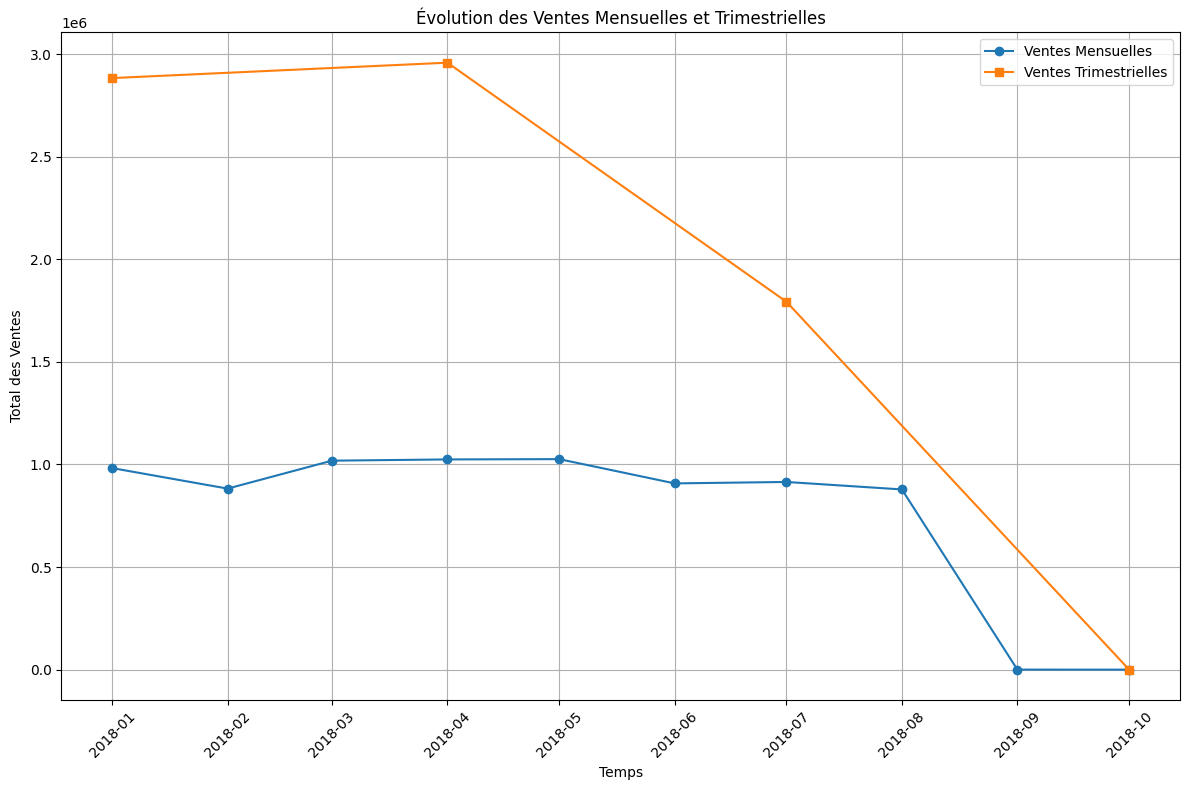

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

# Vérification et conversion pour 'order_month'
if monthly_sales['order_month'].dtype.name == 'period[M]':
    monthly_sales['order_month'] = monthly_sales['order_month'].dt.to_timestamp()

# Vérification et conversion pour 'order_quarter'
if quarterly_sales['order_quarter'].dtype.name == 'period[Q-DEC]':
    quarterly_sales['order_quarter'] = quarterly_sales['order_quarter'].dt.to_timestamp()

# Trace les ventes mensuelles
plt.plot(
    monthly_sales['order_month'],
    monthly_sales['monthly_sales'],
    label="Ventes Mensuelles",
    marker='o'
)

# Trace les ventes trimestrielles
plt.plot(
    quarterly_sales['order_quarter'],
    quarterly_sales['quarterly_sales'],
    label="Ventes Trimestrielles",
    marker='s'
)

# Paramètres du graphique
plt.title("Évolution des Ventes Mensuelles et Trimestrielles")
plt.xlabel("Temps")
plt.ylabel("Total des Ventes")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Les ventes trimestrielles montrent des pics en avril, en croissance entre 2018 et 2018
# Les ventes mensuelles sont en croissance globalement. Ralentissement en juillet ?
# A confirmer par plus d'analyse


# Vente par région


Colonne 'customer_state' ajoutée à transformed_df.
Ventes par région :
   customer_state  total_sales
25             SP   3083736.48
18             RJ    938038.54
10             MG    878183.57
22             RS    408261.97
17             PR    399879.88
4              BA    285340.05
23             SC    285233.82
6              DF    169224.44
8              GO    162525.06
7              ES    149033.66
15             PE    140125.88
5              CE    119103.77
13             PA     86319.75
12             MT     79572.96
14             PB     68059.99
11             MS     65244.02
9              MA     60666.03
19             RN     52704.55
16             PI     52192.49
1              AL     36721.65
26             TO     32012.79
24             SE     28998.07
20             RO     21810.69
2              AM     11976.00
3              AP      7456.76
21             RR      6312.08
0              AC      5363.90


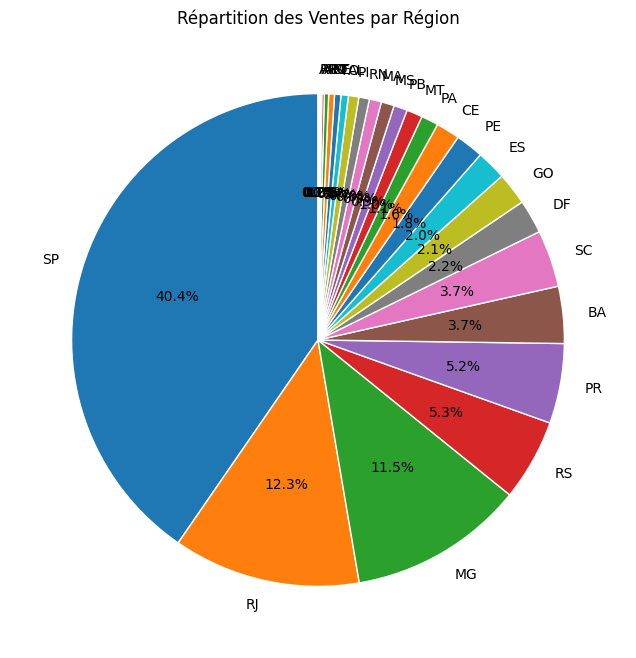

In [ ]:
# Vérifiez que les colonnes nécessaires existent
if {'customer_state', 'price'}.issubset(transformed_df.columns):
    # Calcul des ventes par région/état
    sales_by_region = (
        transformed_df.groupby('customer_state')['price']
        .sum()
        .reset_index()
        .rename(columns={'price': 'total_sales'})
    )

    # Vérifiez que 'customer_id' et 'customer_state' sont présents dans le DataFrame des clients
if {'customer_id', 'customer_state'}.issubset(dataframes['olist_customers_dataset'].columns):
    # Joindre les informations sur l'état/région des clients
    transformed_df = transformed_df.merge(
        dataframes['olist_customers_dataset'][['customer_id', 'customer_state']],
        on='customer_id',
        how='left'
    )
    print("Colonne 'customer_state' ajoutée à transformed_df.")
else:
    print("Les colonnes 'customer_id' ou 'customer_state' sont absentes de olist_customers_dataset.")

# Calcul des ventes par état/région du client
sales_by_region = (
    transformed_df.groupby('customer_state')['price']
    .sum()
    .reset_index()
    .rename(columns={'price': 'total_sales'})
)

# Trier les ventes par région pour une visualisation claire
sales_by_region = sales_by_region.sort_values(by='total_sales', ascending=False)

# Afficher les données de répartition
print("Ventes par région :")
print(sales_by_region)

    # Visualisation avec un diagramme circulaire
plt.figure(figsize=(8, 8))
plt.pie(
        sales_by_region['total_sales'],  # Données des ventes
        labels=sales_by_region['customer_state'],  # Étiquettes des régions/états
        autopct='%1.1f%%',  # Format des pourcentages
        startangle=90,  # Début à 90° pour un rendu clair
        wedgeprops={'edgecolor': 'white'},  # Bordures pour lisibilité
    )
plt.title("Répartition des Ventes par Région")
plt.show()

# Nous affichons bien un diagramme où les régions et leur volume de vente sont affichées
# Le graphique comporte trop de données pour être correctement interprétable / lisible

In [ ]:
print("Colonnes disponibles dans transformed_df :")
print(transformed_df.columns)

Colonnes disponibles dans transformed_df :
Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date',
       'price', 'freight_value', 'product_category_name_x',
       'product_name_lenght_x', 'product_description_lenght_x',
       'product_photos_qty_x', 'product_weight_g_x', 'product_length_cm_x',
       'product_height_cm_x', 'product_width_cm_x', 'product_category_name_y',
       'product_name_lenght_y', 'product_description_lenght_y',
       'product_photos_qty_y', 'product_weight_g_y', 'product_length_cm_y',
       'product_height_cm_y', 'product_width_cm_y',
       'product_category_name_left', 'product_name_lenght_left',
       'product_description_lenght_left', 'product_photos_qty_left',
       'product_weight_g_left', 'product_length_cm_left',
       'p

# Amélioration du graphique

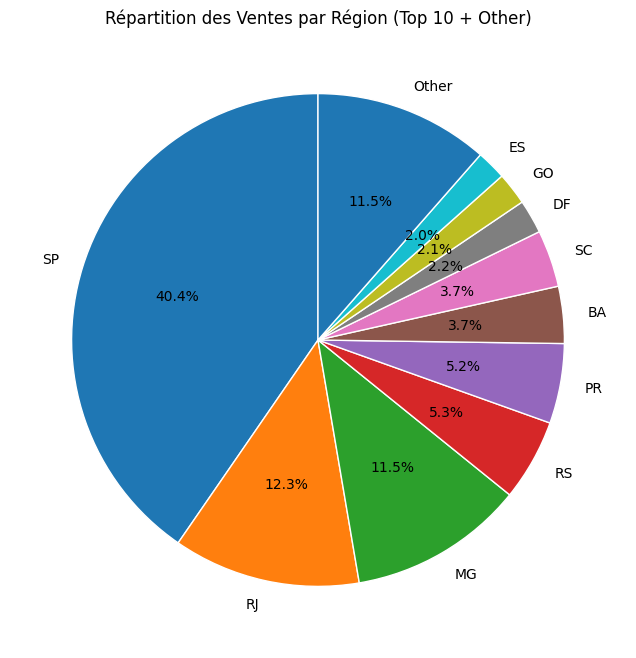

In [ ]:
# Trier les ventes par région dans l'ordre décroissant
sales_by_region = (
    transformed_df.groupby('customer_state')['price']
    .sum()
    .reset_index()
    .rename(columns={'price': 'total_sales'})
    .sort_values(by='total_sales', ascending=False)
)

# Calculer les ventes pour les 10 premières régions et les autres
top_10_sales = sales_by_region.iloc[:10]  # Les 10 premières régions
other_sales = sales_by_region.iloc[10:]['total_sales'].sum()  # Les autres régions

# Créer une ligne pour "Other" et l'ajouter avec pd.concat
other_row = pd.DataFrame({'customer_state': ['Other'], 'total_sales': [other_sales]})
top_10_sales = pd.concat([top_10_sales, other_row], ignore_index=True)

# Générer le graphique en camembert
plt.figure(figsize=(8, 8))
plt.pie(
    top_10_sales['total_sales'],  # Données des ventes
    labels=top_10_sales['customer_state'],  # Étiquettes des régions/états
    autopct='%1.1f%%',  # Format des pourcentages
    startangle=90,  # Début à 90° pour un rendu clair
    wedgeprops={'edgecolor': 'white'},  # Bordures pour lisibilité
)
plt.title("Répartition des Ventes par Région (Top 10 + Other)")
plt.show()

# Le graphique est plus simple à lire, avec SP, MG et RJ les régions les plus rentables

# Relation entre le délai de livraison et le score de satisfaction

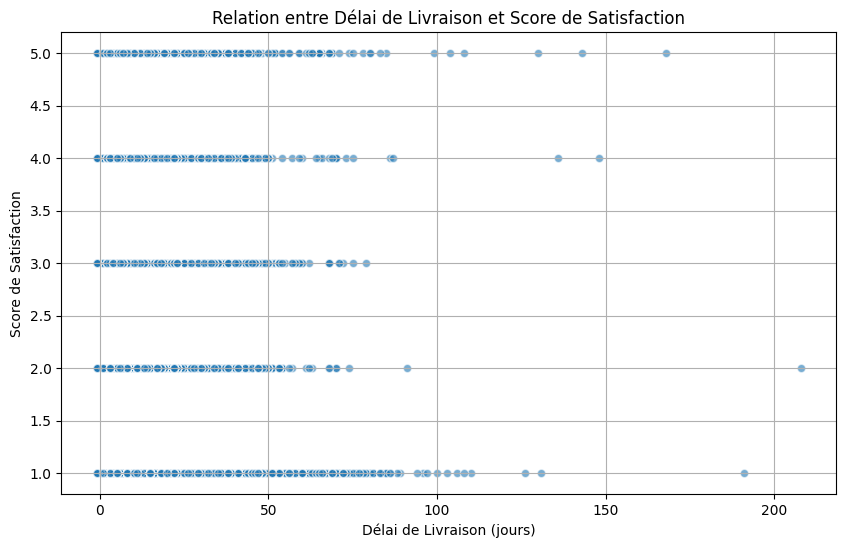

In [ ]:
# Vérifiez que les colonnes nécessaires existent
if {'delivery_delay', 'review_score'}.issubset(analyse_df.columns):
    plt.figure(figsize=(10, 6))

    # Créer un graphique de dispersion
    plt.scatter(
        analyse_df['delivery_delay'],  # Axe X : Délai de livraison
        analyse_df['review_score'],   # Axe Y : Score de satisfaction
        alpha=0.6,                    # Transparence pour mieux voir les points qui se chevauchent
        edgecolors='w',               # Bordures blanches pour les points
    )

    # Ajouter les titres et les étiquettes des axes
    plt.title("Relation entre Délai de Livraison et Score de Satisfaction")
    plt.xlabel("Délai de Livraison (jours)")
    plt.ylabel("Score de Satisfaction")
    plt.grid(True)

    # Afficher le graphique
    plt.show()
else:
    print("Les colonnes 'delivery_delay' et/ou 'review_score' sont manquantes dans analyse_df.")


## Distribution des délais de livraison par région

In [ ]:
print("Colonnes disponibles dans analyse_df :")
print(analyse_df.columns)

# A priori, les colonnes a utiliser pour l'analyse sont seller_state et delivery_state
# Je rajoute les colonnes nécessaires :

if {'order_delivered_customer_date', 'order_purchase_timestamp'}.issubset(analyse_df.columns):
    analyse_df['delivery_delay'] = (
        pd.to_datetime(analyse_df['order_delivered_customer_date']) -
        pd.to_datetime(analyse_df['order_purchase_timestamp'])
    ).dt.days
    print("Colonne 'delivery_delay' ajoutée avec succès.")
else:
    print("Les colonnes nécessaires pour calculer 'delivery_delay' sont manquantes.")
# J'ai rajouté la bonne colonne avec succès

Colonnes disponibles dans analyse_df :
Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date',
       'price', 'freight_value', 'product_category_name',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm', 'seller_zip_code_prefix',
       'seller_city', 'seller_state', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'review_id', 'review_score',
       'review_comment_title', 'review_comment_message',
       'review_creation_date', 'review_answer_timestamp',
       'payment_type_encoded', 'delivery_delay', 'avg_customer_score',
       'avg_category_score', 'order_frequency', 'total_sales', 'average_car

<Figure size 1200x600 with 0 Axes>

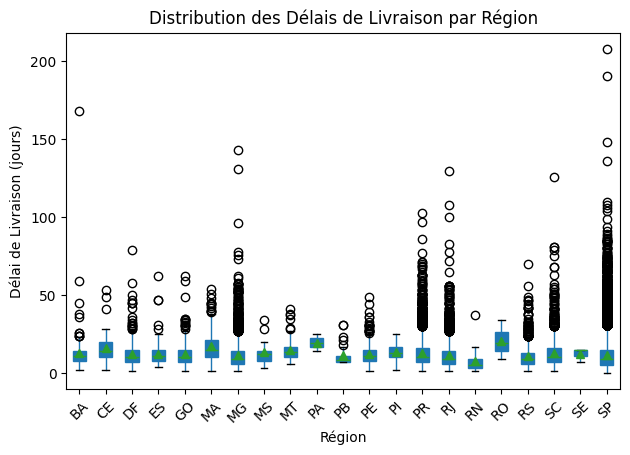

In [ ]:
# Vérifiez que les colonnes nécessaires existent
if {'delivery_delay', 'seller_state'}.issubset(analyse_df.columns):
    plt.figure(figsize=(12, 6))

    # Créer un boxplot pour la distribution des délais de livraison par région
    analyse_df.boxplot(
        column='delivery_delay',          # Colonne pour les valeurs
        by='seller_state',              # Catégorie pour grouper
        grid=False,                       # Désactiver la grille par défaut
        patch_artist=True,                # Style des boîtes
        showmeans=True,                   # Afficher les moyennes
    )

    # Ajouter des titres et étiquettes des axes
    plt.title("Distribution des Délais de Livraison par Région")
    plt.suptitle("")  # Supprimer le titre automatique ajouté par boxplot
    plt.xlabel("Région")
    plt.ylabel("Délai de Livraison (jours)")
    plt.xticks(rotation=45)

    # Afficher le graphique
    plt.tight_layout()
    plt.show()
else:
    print("Les colonnes 'delivery_delay' et/ou 'seller_state' sont manquantes dans analyse_df.")

    # Les boites à moustaches sont correctement affichées
    # La région SP montre beaucoup d'outliers. Etant la région où il y a le plus de vente, c'est logique
    # Mais c'est un point à améliorer pour rendre le business plus efficace


## Comment se distribuent les délais de livraison ?

Observez la fréquence des délais de livraison en jours pour comprendre les tendances générales.
Graphique demandé : Utilisez un histogramme pour représenter la distribution des délais de livraison, afin de voir quels délais sont les plus fréquents.

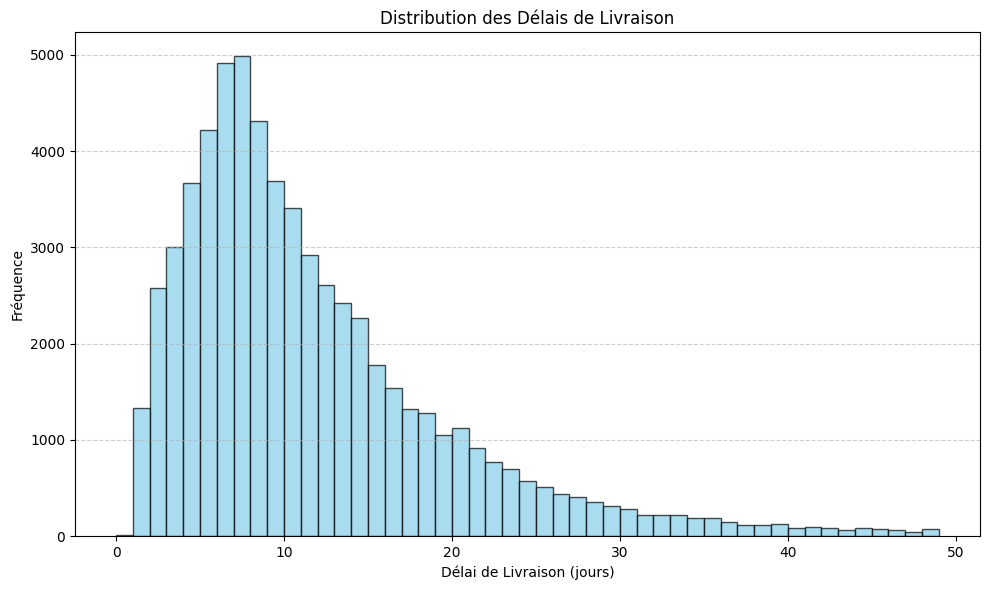

In [ ]:
# Vérifiez que la colonne 'delivery_delay' existe
if 'delivery_delay' in analyse_df.columns:
    plt.figure(figsize=(10, 6))

    # Créer un histogramme pour la distribution des délais de livraison
    plt.hist(
        analyse_df['delivery_delay'],  # Données des délais de livraison
        bins=range(0, 50, 1),          # Plage de 0 à 50 jours avec des intervalles de 1 jour
        color='skyblue',               # Couleur de l'histogramme
        edgecolor='black',             # Bordures pour chaque barre
        alpha=0.7                      # Transparence pour un rendu plus doux
    )

    # Ajouter des titres et étiquettes des axes
    plt.title("Distribution des Délais de Livraison")
    plt.xlabel("Délai de Livraison (jours)")
    plt.ylabel("Fréquence")
    plt.grid(axis='y', linestyle='--', alpha=0.6)  # Grille horizontale pour faciliter la lecture

    # Afficher le graphique
    plt.tight_layout()
    plt.show()
else:
    print("La colonne 'delivery_delay' est manquante dans analyse_df.")

    # Courbe asymétrique à droite, avec des délais de livraisons parfois très longs
    # Jusqu'à presque 50 jours ( 2 mois !)
    # En général, un délais de 21 jours est déjà ressenti comme très long par le client
    # Ce point est une bonne source d'amélioration
    # A noter qu'il ne remontait pas dans les données de satisfaction client
    # C'est normal : les données de satisfaction client sont en général biaisées par nature
    # En effet, les clients laissant des commentaires sont plus souvent les clients satisfaits


### 6. Agrégations et Modélisations Avancées
   - Segmenter les clients en fonction de leurs comportements d’achat.
   - Analyser les performances des catégories de produits pour recommander des stratégies d’amélioration du catalogue.
   - Identifier des patterns de livraison par région pour optimiser la logistique.


In [ ]:
print("Colonnes disponibles dans transformed_df :")
print(transformed_df.columns)

Colonnes disponibles dans transformed_df :
Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date',
       'price', 'freight_value', 'product_category_name_x',
       'product_name_lenght_x', 'product_description_lenght_x',
       'product_photos_qty_x', 'product_weight_g_x', 'product_length_cm_x',
       'product_height_cm_x', 'product_width_cm_x', 'product_category_name_y',
       'product_name_lenght_y', 'product_description_lenght_y',
       'product_photos_qty_y', 'product_weight_g_y', 'product_length_cm_y',
       'product_height_cm_y', 'product_width_cm_y',
       'product_category_name_left', 'product_name_lenght_left',
       'product_description_lenght_left', 'product_photos_qty_left',
       'product_weight_g_left', 'product_length_cm_left',
       'p

## Segmentation des clients

Résumé des segments :
         order_frequency  total_sales  average_cart
cluster                                            
0                    1.0   537.397970    537.397970
1                    1.0  2004.795934   2004.795934
2                    1.0    96.018485     96.018485


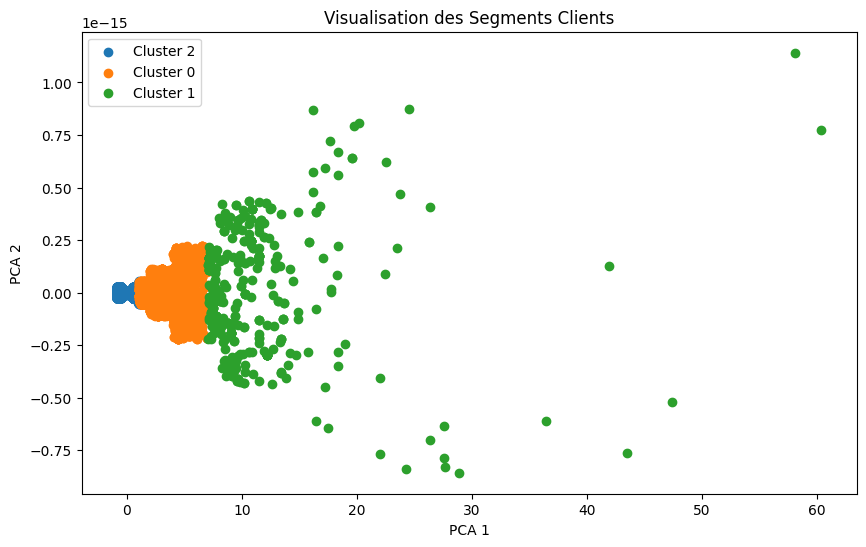

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Sélection des colonnes pour la segmentation
segmentation_features = ['order_frequency', 'total_sales', 'average_cart']
segmentation_df = transformed_df[['customer_id'] + segmentation_features].drop_duplicates(subset='customer_id')

# Normalisation des données
scaler = StandardScaler()
segmentation_df_scaled = segmentation_df.copy()
segmentation_df_scaled[segmentation_features] = scaler.fit_transform(segmentation_df[segmentation_features])

# Appliquer K-Means pour 3 segments (ajustez selon vos besoins)
kmeans = KMeans(n_clusters=3, random_state=42)
segmentation_df_scaled['cluster'] = kmeans.fit_predict(segmentation_df_scaled[segmentation_features])

# Ajouter les clusters au DataFrame principal
segmentation_df['cluster'] = segmentation_df_scaled['cluster']

# Analyse des segments
segment_summary = segmentation_df.groupby('cluster')[segmentation_features].mean()
print("Résumé des segments :")
print(segment_summary)

# Réduction des dimensions pour visualisation
pca = PCA(n_components=2)
segmentation_df_scaled['pca_1'], segmentation_df_scaled['pca_2'] = zip(*pca.fit_transform(segmentation_df_scaled[segmentation_features]))

# Visualisation des segments
plt.figure(figsize=(10, 6))
for cluster in segmentation_df_scaled['cluster'].unique():
    subset = segmentation_df_scaled[segmentation_df_scaled['cluster'] == cluster]
    plt.scatter(subset['pca_1'], subset['pca_2'], label=f'Cluster {cluster}')

plt.title("Visualisation des Segments Clients")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend()
plt.show()

# Nous avons 3 segments de clients
# Toutefois, la fréquence de commande étant de 1 pour les 3 segments
# et la moyenne étant égale au total des commandes
# J'ai un très gros doute sur la validité des données
# On a un problème d'échantillonnage, ou de forme de data


Étape 1 : Agrégation des performances par catégorie

In [ ]:
# Vérification des colonnes nécessaires
required_columns = ['product_category_name', 'price', 'review_score']
if not set(required_columns).issubset(transformed_df.columns):
    raise ValueError(f"Les colonnes nécessaires {required_columns} sont manquantes.")

# Agréger les performances par catégorie de produit
category_performance = transformed_df.groupby('product_category_name').agg(
    total_sales=('price', 'sum'),          # Chiffre d'affaires total
    total_items=('order_item_id', 'count'),# Nombre d'articles vendus
    avg_review_score=('review_score', 'mean')  # Score moyen de satisfaction
).reset_index()

# Trier par chiffre d'affaires décroissant
category_performance = category_performance.sort_values(by='total_sales', ascending=False)

# Afficher les 10 premières catégories
print("Top 10 des catégories par chiffre d'affaires :")
print(category_performance.head(10))

# Nous avons bien les 10 premières catégories affichées
# NOTE : refaire tourner les différentes cellules à l'exclusion de celles sélectionnant un seul produit


Top 10 des catégories par chiffre d'affaires :
     product_category_name  total_sales  total_items  avg_review_score
11            beleza_saude    784238.76         6080          4.151809
66      relogios_presentes    733303.25         3809          3.982148
13         cama_mesa_banho    559257.46         6135          3.875143
32           esporte_lazer    543278.79         4647          4.042608
44  informatica_acessorios    525379.68         4858          3.889049
71   utilidades_domesticas    417113.73         4227          4.050627
54        moveis_decoracao    403597.27         4275          3.909474
8               automotivo    359603.52         2697          4.100482
9                    bebes    272867.94         1853          3.990286
26              cool_stuff    244755.51         1519          4.048716


Étape 2 : Visualisation des performances

In [ ]:
# Agrégation des données par catégorie de produit
category_performance = transformed_df.groupby('product_category_name').agg(
    total_sales=('price', 'sum'),          # Chiffre d'affaires total
    total_items=('order_item_id', 'count'),# Nombre total d'articles vendus
    avg_review_score=('review_score', 'mean')  # Score moyen de satisfaction
).reset_index()

# Trier par chiffre d'affaires décroissant
category_performance = category_performance.sort_values(by='total_sales', ascending=False)

# Afficher les 10 premières catégories
print("Top 10 des catégories par chiffre d'affaires :")
print(category_performance.head(10))

Top 10 des catégories par chiffre d'affaires :
     product_category_name  total_sales  total_items  avg_review_score
11            beleza_saude    784238.76         6080          4.151809
66      relogios_presentes    733303.25         3809          3.982148
13         cama_mesa_banho    559257.46         6135          3.875143
32           esporte_lazer    543278.79         4647          4.042608
44  informatica_acessorios    525379.68         4858          3.889049
71   utilidades_domesticas    417113.73         4227          4.050627
54        moveis_decoracao    403597.27         4275          3.909474
8               automotivo    359603.52         2697          4.100482
9                    bebes    272867.94         1853          3.990286
26              cool_stuff    244755.51         1519          4.048716


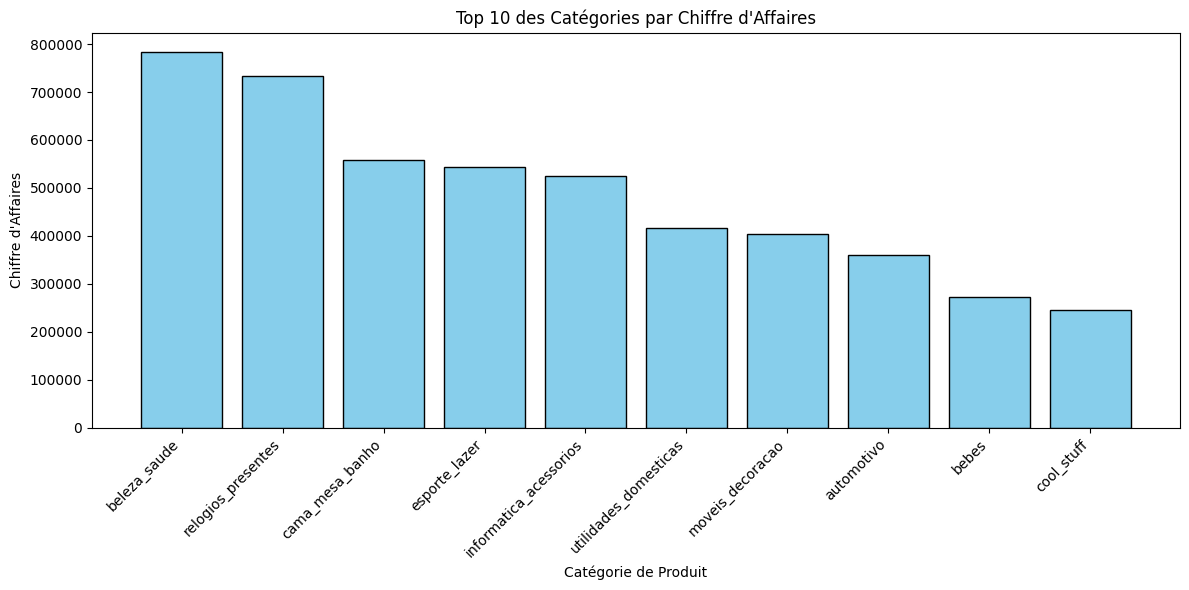

In [ ]:
import matplotlib.pyplot as plt

# Graphique des ventes totales pour les 10 premières catégories
top_10_sales = category_performance.head(10)

plt.figure(figsize=(12, 6))
plt.bar(top_10_sales['product_category_name'], top_10_sales['total_sales'], color='skyblue', edgecolor='black')
plt.title("Top 10 des Catégories par Chiffre d'Affaires")
plt.xlabel("Catégorie de Produit")
plt.ylabel("Chiffre d'Affaires")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Belza-saude est le top des ventes avec une répartition assez équitable pour chacun des produits


2. Scores moyens de satisfaction par catégorie :

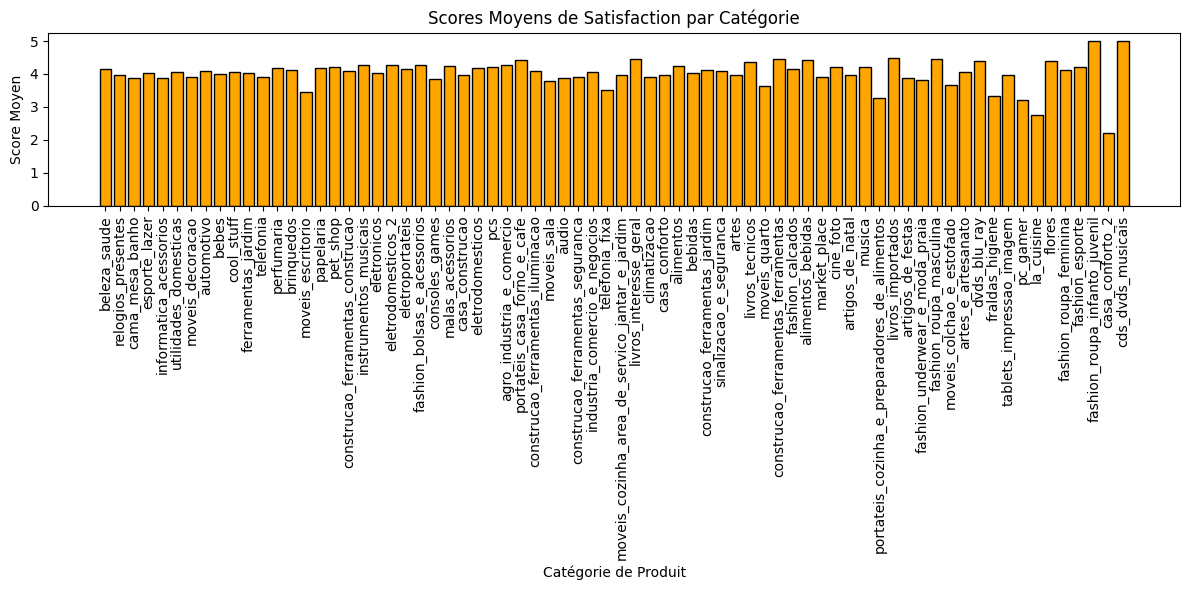

In [ ]:
# Graphique des scores moyens de satisfaction
plt.figure(figsize=(12, 6))
plt.bar(category_performance['product_category_name'], category_performance['avg_review_score'], color='orange', edgecolor='black')
plt.title("Scores Moyens de Satisfaction par Catégorie")
plt.xlabel("Catégorie de Produit")
plt.ylabel("Score Moyen")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# les satisfations clients sont presque toutes au dessus de 3
# la valeur la plus basse est casa_conforto_2
# Le graphique affiche trop de valeur pour être exploitable
# Il faut clusteriser les données par des métriques en lien avec les produits


Étape 3 : Identifier les catégories sous-performantes

In [ ]:
# Calcul des métriques pour identifier les catégories sous-performantes
median_sales = category_performance['total_sales'].median()

low_performance = category_performance[
    (category_performance['total_sales'] < median_sales) & (category_performance['avg_review_score'] < 3.5)
]

print("Catégories sous-performantes :")
print(low_performance)

# Les catégories sous-performantes sont :
# portateis_cozinha_e_preparadores_de_alimentos
# fraldas_higiene
# pc_game
# la_cuisine
# casa_conforto_2


Catégories sous-performantes :
                            product_category_name  total_sales  total_items  \
65  portateis_cozinha_e_preparadores_de_alimentos      3968.53           15   
42                                fraldas_higiene      1356.69           36   
60                                       pc_gamer      1025.99            5   
46                                     la_cuisine       781.00            4   
15                                casa_conforto_2       151.09           10   

    avg_review_score  
65          3.266667  
42          3.333333  
60          3.200000  
46          2.750000  
15          2.200000  


## Identifier des patterns de livraison par région pour optimiser la logistique.

In [ ]:
# Vérifiez les colonnes nécessaires
print("Colonnes dans transformed_df :")
print(transformed_df.columns)

Colonnes dans transformed_df :
Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date',
       'price', 'freight_value', 'product_category_name',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm', 'seller_zip_code_prefix',
       'seller_city', 'seller_state', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'review_id', 'review_score',
       'review_comment_title', 'review_comment_message',
       'review_creation_date', 'review_answer_timestamp',
       'payment_type_encoded', 'delivery_delay', 'avg_customer_score',
       'avg_category_score', 'order_frequency', 'total_sales', 'average_cart',
    

# Visualisation des délais de livraison par région

In [ ]:
# Agréger les délais de livraison par région (seller_state)
delivery_by_region = transformed_df.groupby('seller_state')['delivery_delay'].mean().reset_index()

# Trier par délai moyen de livraison décroissant
delivery_by_region = delivery_by_region.sort_values(by='delivery_delay', ascending=False)

# Afficher les 10 régions avec les délais de livraison les plus longs
print("Délais de livraison moyens par région :")
print(delivery_by_region.head(10))


Délais de livraison moyens par région :
   seller_state  delivery_delay
16           RO       20.666667
9            PA       19.500000
5            MA       17.047146
1            CE       16.020833
8            MT       14.481481
7            MS       13.200000
18           SC       12.648662
13           PR       12.429926
3            ES       12.338028
19           SE       12.333333


<Figure size 1200x600 with 0 Axes>

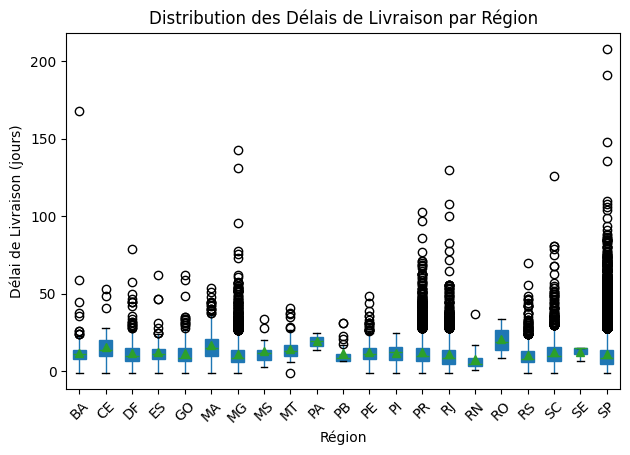

In [ ]:
import matplotlib.pyplot as plt

# Créer un boxplot pour les délais de livraison par région
plt.figure(figsize=(12, 6))

transformed_df.boxplot(
    column='delivery_delay',          # Colonne pour les valeurs
    by='seller_state',                # Catégorie pour grouper
    grid=False,                       # Désactiver la grille par défaut
    patch_artist=True,                # Style des boîtes
    showmeans=True,                   # Afficher les moyennes
)

# Ajouter des titres et étiquettes des axes
plt.title("Distribution des Délais de Livraison par Région")
plt.suptitle("")  # Supprimer le titre automatique ajouté par boxplot
plt.xlabel("Région")
plt.ylabel("Délai de Livraison (jours)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



# Identification des régions avec les délais les plus longs

In [ ]:
# Calcul de la médiane des délais de livraison par région
delivery_by_region_median = transformed_df.groupby('seller_state')['delivery_delay'].median().reset_index()

# Trier les régions selon la médiane des délais de livraison
delivery_by_region_median = delivery_by_region_median.sort_values(by='delivery_delay', ascending=False)

# Afficher les régions avec les délais de livraison les plus longs (par médiane)
print("Régions avec les délais de livraison les plus longs (par médiane) :")
print(delivery_by_region_median.head(10))

# Classement des médianes les plus longues : PA, RO, SE, MA, CE sont en tête.
# Ce sont donc les régions à travailler en priorité

Régions avec les délais de livraison les plus longs (par médiane) :
   seller_state  delivery_delay
9            PA            19.5
16           RO            19.0
19           SE            15.0
5            MA            15.0
1            CE            14.0
8            MT            13.0
12           PI            12.5
7            MS            12.0
0            BA            11.0
3            ES            11.0


# Recherche des outliers

In [ ]:
# Extraire les valeurs aberrantes (outliers) dans les délais de livraison
Q1 = transformed_df['delivery_delay'].quantile(0.25)
Q3 = transformed_df['delivery_delay'].quantile(0.75)
IQR = Q3 - Q1
outliers = transformed_df[(transformed_df['delivery_delay'] < (Q1 - 1.5 * IQR)) | (transformed_df['delivery_delay'] > (Q3 + 1.5 * IQR))]

print(f"Nombre d'outliers dans les délais de livraison : {outliers.shape[0]}")
print("Aperçu des outliers :")
print(outliers[['order_id', 'seller_state', 'delivery_delay']].head())

# Deux régions sont particulièrement touchées : SC et SP
# IL serait pertinent de regarder la fréquence de ces données abérantes
# si ce sont des évenements exceptionnels ou parfois répété
# si les circonstances peuvent les expliquer : calendrier (jour fériés ?)
# Ou évènement extérieur rare : inondations, grèves, etc..

# Est-ce que ce sont des régions beaucoup plus vastes que les autres ?
# Est-ce que le réseau de distribution y rencontre des problèmes ?
# Région de montagne, par exemple ? Pays entiers alors que les autres données
# sont des régions plus restreintes ?

Nombre d'outliers dans les délais de livraison : 2661
Aperçu des outliers :
                             order_id seller_state  delivery_delay
166  f31535f21d145b2345e2bf7f09d62322           SC            81.0
167  f31535f21d145b2345e2bf7f09d62322           SC            81.0
202  06ae7271902bbb087fc093137fee6e81           SP            31.0
234  f11e9516ca2b6091b64f2e2ea0ebebb3           SP            34.0
287  690199d6a2c51ff57c6b392d7680cbfd           SP            59.0
